In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

df = pd.read_csv('diabetes_cleaned_12-14-20B.csv')

In [2]:
df.shape

(69970, 94)

In [52]:
df.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'readmit_30d', 'age_num',
       '424_in_diag', '599_in_diag', '276_in_diag', '562_in_diag',
       '493_in_diag', '996_in_diag', '786_in_diag', '305_in_diag',
       'V57_in_diag', '715_in_diag', '401_in_diag', '435_in_diag',
       '38_in_diag', '425_in_diag', '486_in_diag', '296_in_diag',
       '518_in_diag', '434_in_diag', '780_in_diag', '440_in_diag',
       '585_in_diag', '577_in_diag', '285_in_diag', '250_in_diag',
       'V45_in_diag', '414_in_diag', '427_in_diag', '410_in_diag',
       '411_in_diag', '41_in_diag', '428_in_diag', '560_in_diag',
       '722_in_diag', '413_in_diag', '820_in_diag', '574_in_diag',
       '278_in_diag', '433_in_diag', '496_in_diag', '491_in_diag',
       '682_in_diag', '707_in_diag', '403_in_diag', '584_in_diag',
       '272_in_diag', 'metformin_used', 'repaglinide_used'

In [3]:
df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmit_30d,age_num,424_in_diag,599_in_diag,276_in_diag,562_in_diag,493_in_diag,996_in_diag,786_in_diag,305_in_diag,V57_in_diag,715_in_diag,401_in_diag,435_in_diag,38_in_diag,425_in_diag,486_in_diag,296_in_diag,518_in_diag,434_in_diag,780_in_diag,440_in_diag,585_in_diag,577_in_diag,285_in_diag,250_in_diag,V45_in_diag,414_in_diag,427_in_diag,410_in_diag,411_in_diag,41_in_diag,428_in_diag,560_in_diag,722_in_diag,413_in_diag,820_in_diag,574_in_diag,278_in_diag,433_in_diag,496_in_diag,491_in_diag,682_in_diag,707_in_diag,403_in_diag,584_in_diag,272_in_diag,metformin_used,repaglinide_used,glimepiride_used,glipizide_used,glyburide_used,pioglitazone_used,rosiglitazone_used,insulin_used,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,admission_type_id_2,admission_type_id_3,admission_type_id_5,admission_type_id_6,discharge_disposition_id_18,discharge_disposition_id_2,discharge_disposition_id_22,discharge_disposition_id_25,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,admission_source_id_17,admission_source_id_2,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_No,diabetesMed_Yes
0,13,68,2,28,0,0,0,8,False,85,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1
1,12,33,3,18,0,0,0,8,False,95,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1
2,1,51,0,8,0,0,0,5,False,45,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1
3,9,47,2,17,0,0,0,9,False,45,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1
4,3,31,6,16,0,0,0,9,False,55,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1


In [35]:
import pandas as pd
import numpy as np
diabetic = pd.read_csv('diabetic_data.csv')

In [36]:
diabetic_df = diabetic.replace('?', np.nan)
diabetic_df = diabetic_df.sort_values('encounter_id')
diabetic_df.drop_duplicates(subset = ['patient_nbr'], keep = 'first', inplace = True)
print(diabetic_df.shape)
diabetic_df = diabetic_df[~diabetic_df['discharge_disposition_id'].isin([11,13,14,19,20,21])]
print(diabetic_df.shape)
diabetic_df.drop(diabetic_df.loc[diabetic_df.gender=='Unknown/Invalid'].index,inplace=True)
print(diabetic_df.shape)

(71518, 50)
(69973, 50)
(69970, 50)


In [49]:
len(set(np.concatenate([diabetic_df.diag_1.value_counts().index.values,diabetic_df.diag_2.value_counts().index.values,diabetic_df.diag_3.value_counts().index.values]).tolist()))


894

In [50]:
diabetic_df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [17]:
diabetic_df['readmit_30d'] = diabetic_df.readmitted.apply(lambda x: 1 if x=='<30' else 0)

In [18]:
diabetic_df.drop(['encounter_id','patient_nbr','weight','medical_specialty','payer_code'],\
                 axis = 1, inplace = True)

In [19]:
diabetic_df['age_num'] = diabetic_df['age'].replace(
    ['[0-10)','[10-20)','[20-30)','[30-40)','[40-50)','[50-60)','[60-70)','[70-80)','[80-90)','[90-100)'],
    [5,15,25,35,45,55,65,75,85,95])

In [20]:
diabetic_final = diabetic_df.drop(['age',
                                   'diag_1','diag_2','diag_3',
                                   'metformin','repaglinide','nateglinide','chlorpropamide','glimepiride',
                                   'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone',
                                   'rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide',
                                   'citoglipton','insulin','glyburide-metformin','glipizide-metformin',
                                   'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone',
                                   'readmitted'],
                                 axis = 1)

In [21]:
diabetic_final.head()

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmit_30d,age_num
8,Caucasian,Female,2,1,4,13,68,2,28,0,0,0,8,None,None,Ch,Yes,0,85
9,Caucasian,Female,3,3,4,12,33,3,18,0,0,0,8,None,None,Ch,Yes,0,95
4,Caucasian,Male,1,1,7,1,51,0,8,0,0,0,5,None,None,Ch,Yes,0,45
10,AfricanAmerican,Female,1,1,7,9,47,2,17,0,0,0,9,None,None,No,Yes,0,45
5,Caucasian,Male,2,1,2,3,31,6,16,0,0,0,9,None,None,No,Yes,0,55


In [23]:
diabetic_final.readmit_30d.mean()

0.08970987566099757

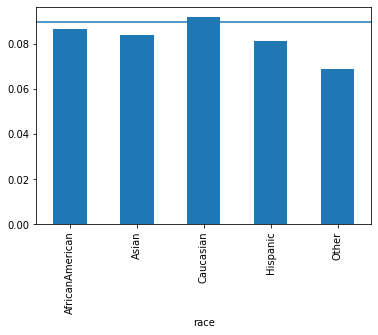

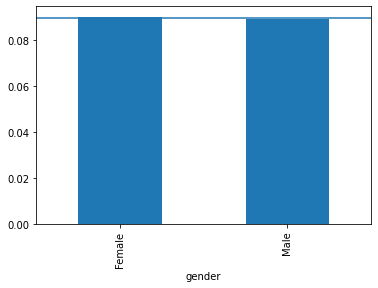

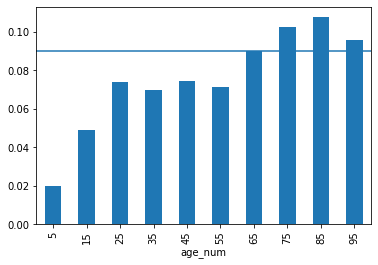

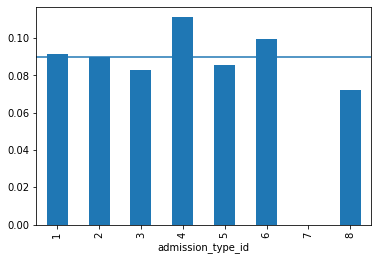

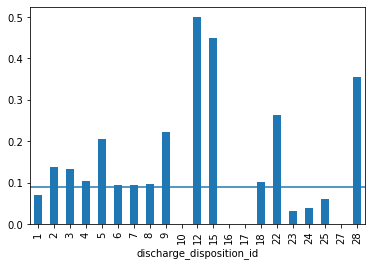

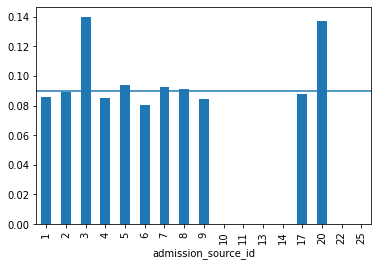

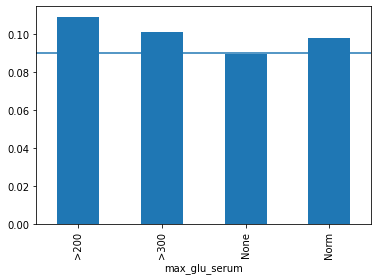

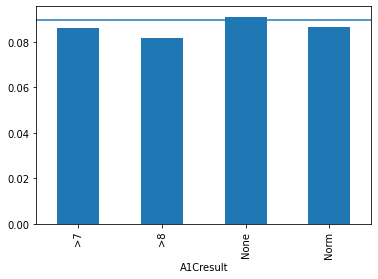

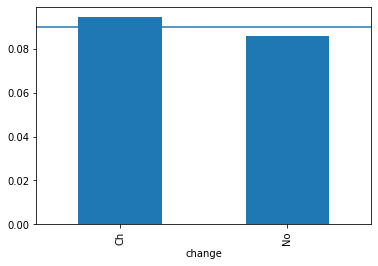

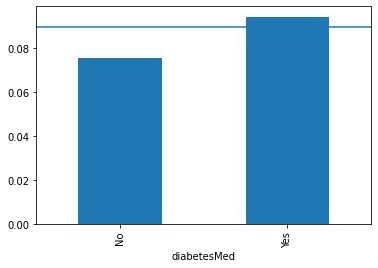

In [34]:
categorical_columns = ['race','gender','age_num','admission_type_id','discharge_disposition_id','admission_source_id',
                       'max_glu_serum','A1Cresult','change','diabetesMed']
for i in categorical_columns:
    diabetic_final.groupby(i).readmit_30d.mean().plot.bar()
    plt.axhline(diabetic_final.readmit_30d.mean())
    plt.show()

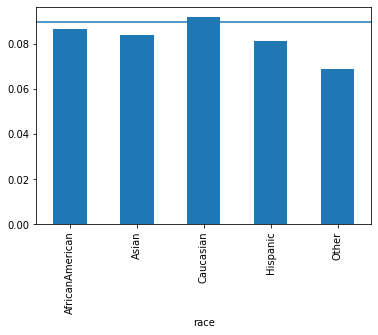

In [33]:

diabetic_final.groupby('race').readmit_30d.mean().plot.bar()
plt.axhline(diabetic_final.readmit_30d.mean())
plt.show()